# Indian Agricultural Mandi Price Analysis (2023–2025)

## Pre-processing the data

### Import the necessary libraries

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load the 700000+ Indian Agricultural Mandi Price dataset

In [9]:
df = pd.read_csv('Agriculture_price_dataset.csv')

In [10]:
df.head()

,STATE,District Name,Market Name,Commodity,Variety,Grade,Min_Price,Max_Price,Modal_Price,Price Date
0,Maharashtra,nashik,Lasalgaon(Niphad),Wheat,Maharashtra 2189,FAQ,2172.0,2399.0,2300.0,6/6/2023
1,Maharashtra,satara,Patan,Tomato,Other,FAQ,1000.0,1500.0,1250.0,6/6/2023
2,Uttar Pradesh,mainpuri,Bewar,Potato,Local,FAQ,800.0,820.0,810.0,6/6/2023
3,Rajasthan,chittorgarh,Nimbahera,Wheat,Other,FAQ,2040.0,2668.0,2300.0,6/6/2023
4,Rajasthan,pratapgarh,Pratapgarh,Onion,Other,FAQ,476.0,1043.0,617.0,6/6/2023


In [11]:
df

,STATE,District Name,Market Name,Commodity,Variety,Grade,Min_Price,Max_Price,Modal_Price,Price Date
0,Maharashtra,nashik,Lasalgaon(Niphad),Wheat,Maharashtra 2189,FAQ,2172.0,2399.0,2300.0,6/6/2023
1,Maharashtra,satara,Patan,Tomato,Other,FAQ,1000.0,1500.0,1250.0,6/6/2023
2,Uttar Pradesh,mainpuri,Bewar,Potato,Local,FAQ,800.0,820.0,810.0,6/6/2023
3,Rajasthan,chittorgarh,Nimbahera,Wheat,Other,FAQ,2040.0,2668.0,2300.0,6/6/2023
4,Rajasthan,pratapgarh,Pratapgarh,Onion,Other,FAQ,476.0,1043.0,617.0,6/6/2023
...,...,...,...,...,...,...,...,...,...,...
737387,Tamilnadu,namakkal,Kumarapalayam(Uzhavar Sandhai ),Potato,(Red Nanital),Local,3000.0,3500.0,3500.0,6/11/2025
737388,Orissa,dhenkanal,Kamakhyanagar,Potato,Potato,Non-FAQ,1900.0,2200.0,2000.0,6/11/2025
737389,Tamilnadu,dindigul,Vedasanthur(Uzhavar Sandhai ),Potato,(Red Nanital),Local,3500.0,4000.0,4000.0,6/11/2025
737390,Tamilnadu,virudhunagar,Virudhunagar(Uzhavar Sandhai ),Onion,Bellary,Local,2800.0,3000.0,3000.0,6/11/2025


### Data Integrity

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737392 entries, 0 to 737391
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   STATE          737392 non-null  object 
 1   District Name  737392 non-null  object 
 2   Market Name    737392 non-null  object 
 3   Commodity      737392 non-null  object 
 4   Variety        737392 non-null  object 
 5   Grade          737392 non-null  object 
 6   Min_Price      737392 non-null  float64
 7   Max_Price      737392 non-null  float64
 8   Modal_Price    737392 non-null  float64
 9   Price Date     737392 non-null  object 
dtypes: float64(3), object(7)
memory usage: 56.3+ MB


### Count missing values in each column

In [13]:
df.isnull().sum()

STATE            0
District Name    0
Market Name      0
Commodity        0
Variety          0
Grade            0
Min_Price        0
Max_Price        0
Modal_Price      0
Price Date       0
dtype: int64

### Descriptive Statistics

In [14]:
df.describe()

,Min_Price,Max_Price,Modal_Price
count,737392.000000,737392.000000,737392.000000
mean,2204.849862,2659.733824,2474.484638
std,1920.977696,2145.250773,2023.851909
min,0.000000,0.000000,0.000000
25%,1100.000000,1500.000000,1300.000000
50%,2000.000000,2300.000000,2150.000000
75%,2700.000000,3205.000000,3000.000000
max,420000.000000,480000.000000,460000.000000


## Year-wise Average Modal Price per Commodity

### Renaming Columns in Cataset  

In [15]:
df.rename(columns={"STATE": "State"}, inplace=True)

### Identify the Unique Value and Apply corrections only to State Column

In [16]:
print(df["State"].unique())

['Maharashtra' 'Uttar Pradesh' 'Rajasthan' 'Haryana' 'West Bengal'
 'Himachal Pradesh' 'Gujarat' 'Meghalaya' 'Madhya Pradesh'
 'Andhra Pradesh' 'Kerala' 'Nagaland' 'Orissa' 'Karnataka' 'Assam'
 'Punjab' 'Jammu & Kashmir' 'Delhi' 'Chattisgarh' 'Bihar' ' Punjab'
 'Jammu and Kashmir' 'Chhattisgarh' 'Uttrakhand' 'Chandigarh' 'Manipur'
 'Tamilnadu' 'Tripura' 'Tamil Nadu' 'Gao']


In [17]:
state_corrections = {
    "Tamilnadu": "Tamil Nadu",
    " Punjab": "Punjab",  
    "Jammu and Kashmir": "Jammu & Kashmir",
    "Chattisgarh": "Chhattisgarh",
    "Chandigarh":"Chhattisgarh",
    "Uttrakhand": "Uttarakhand",
    "Orissa": "Odisha",   
    "Gao": "Goa"          
}

In [18]:
df["State"] = df["State"].replace(state_corrections)

In [19]:
print(df["State"].unique())

['Maharashtra' 'Uttar Pradesh' 'Rajasthan' 'Haryana' 'West Bengal'
 'Himachal Pradesh' 'Gujarat' 'Meghalaya' 'Madhya Pradesh'
 'Andhra Pradesh' 'Kerala' 'Nagaland' 'Odisha' 'Karnataka' 'Assam'
 'Punjab' 'Jammu & Kashmir' 'Delhi' 'Chhattisgarh' 'Bihar' 'Uttarakhand'
 'Manipur' 'Tamil Nadu' 'Tripura' 'Goa']


### Identify the Unique Value in Commodity

In [20]:
Commodity_value = df["Commodity"].unique()

In [21]:
print(Commodity_value)

['Wheat' 'Tomato' 'Potato' 'Onion' 'Rice']


### Convert Price Date to Datetime

In [22]:
df['Price Date'] = pd.to_datetime(df['Price Date'], errors='coerce')

In [23]:
df['Year'] = df['Price Date'].dt.year

In [24]:
yearly_prices = df.groupby(['Year', 'Commodity'])['Modal_Price'].mean().reset_index()

In [25]:
print(yearly_prices.head(20))

   Year Commodity  Modal_Price
0  2023     Onion  2493.349412
1  2023    Potato  1402.528723
2  2023    Tomato  4414.204136
3  2023     Wheat  2411.885622
4  2024     Onion  3211.002733
5  2024    Potato  2393.675617
6  2024     Wheat  2539.163094
7  2025     Onion  2259.678859
8  2025    Potato  1923.065059
9  2025      Rice  3582.892701


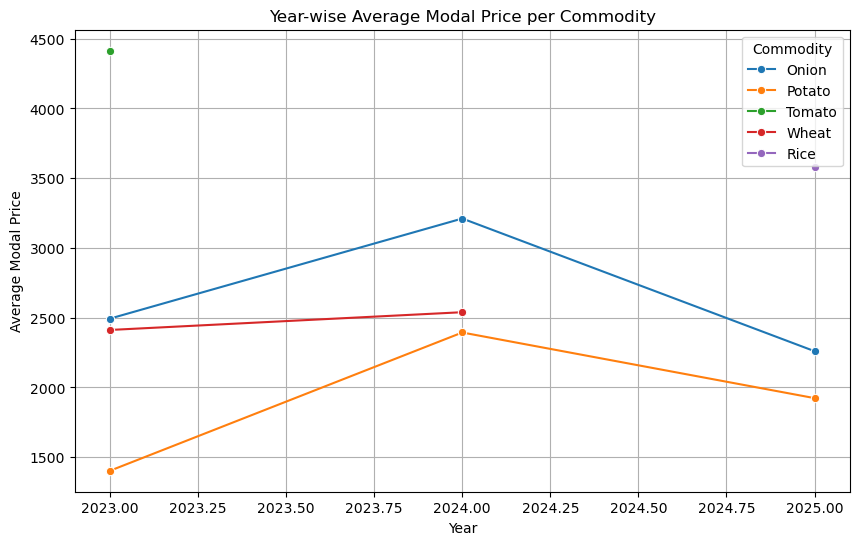

In [26]:
plt.figure(figsize=(10,6))
sns.lineplot(data=yearly_prices, x='Year', y='Modal_Price', hue='Commodity', marker="o")
plt.title("Year-wise Average Modal Price per Commodity")
plt.ylabel("Average Modal Price")
plt.xlabel("Year")
plt.legend(title="Commodity")
plt.grid(True)
plt.show()

## Seasonal Price Trend (Month and Commodity wise)

In [27]:
df['Month'] = df['Price Date'].dt.month_name()

In [28]:
month_order = ["January","February","March","April","May","June",
               "July","August","September","October","November","December"]

In [29]:
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

In [30]:
monthly_trend = df.groupby(['Commodity', 'Month'], observed=False)['Modal_Price'].mean().reset_index()

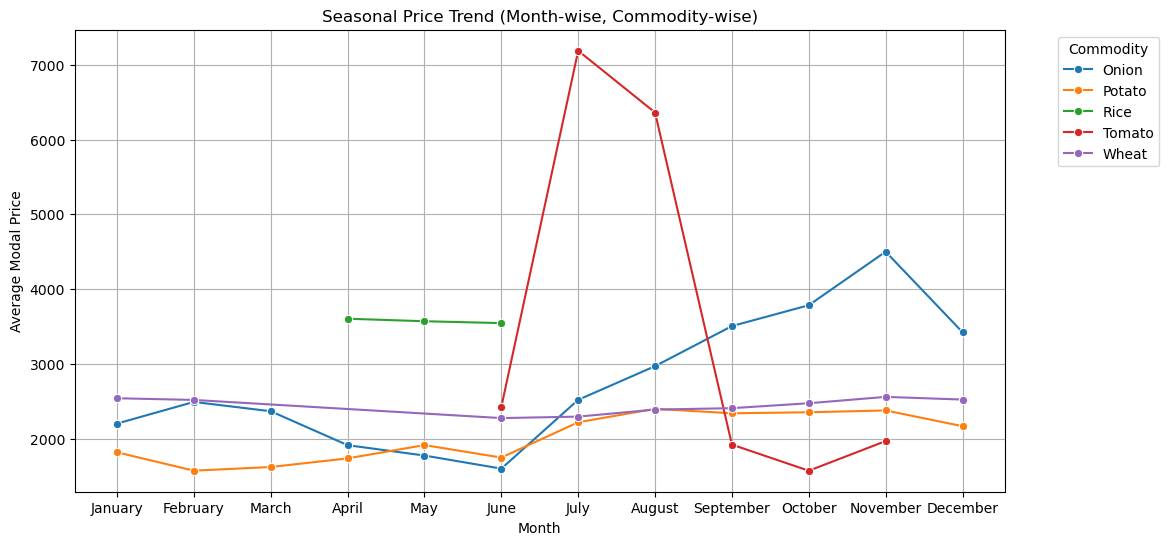

In [31]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_trend, x='Month', y='Modal_Price', hue='Commodity', marker="o")
plt.title("Seasonal Price Trend (Month-wise, Commodity-wise)")
plt.ylabel("Average Modal Price")
plt.xlabel("Month")
plt.legend(title="Commodity", bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(True)
plt.show()

## Tamil Nadu - Top 3 Grades (Min, Max and Modal Price wise)

In [32]:
tn_df = df[df['State'] == 'Tamil Nadu']

In [33]:
tn_df

,State,District Name,Market Name,Commodity,Variety,Grade,Min_Price,Max_Price,Modal_Price,Price Date,Year,Month
109009,Tamil Nadu,namakkal,Namagiripettai,Onion,Onion,FAQ,4000.0,4198.0,4100.0,2023-08-17,2023,August
114920,Tamil Nadu,namakkal,Namagiripettai,Onion,Onion,FAQ,3546.0,3920.0,3733.0,2023-08-22,2023,August
119525,Tamil Nadu,namakkal,Namagiripettai,Onion,Onion,FAQ,3300.0,3609.0,3450.0,2023-08-25,2023,August
123142,Tamil Nadu,namakkal,Namagiripettai,Onion,Onion,FAQ,2609.0,2964.0,2787.0,2023-08-29,2023,August
130963,Tamil Nadu,namakkal,Namagiripettai,Onion,Onion,FAQ,3626.0,3820.0,3723.0,2023-09-05,2023,September
...,...,...,...,...,...,...,...,...,...,...,...,...
737381,Tamil Nadu,dharmapuri,AJattihalli(Uzhavar Sandhai ),Potato,(Red Nanital),Local,3200.0,3400.0,3400.0,2025-06-11,2025,June
737385,Tamil Nadu,coimbatore,Udumalpet,Potato,(Red Nanital),Local,3800.0,5800.0,5800.0,2025-06-11,2025,June
737387,Tamil Nadu,namakkal,Kumarapalayam(Uzhavar Sandhai ),Potato,(Red Nanital),Local,3000.0,3500.0,3500.0,2025-06-11,2025,June
737389,Tamil Nadu,dindigul,Vedasanthur(Uzhavar Sandhai ),Potato,(Red Nanital),Local,3500.0,4000.0,4000.0,2025-06-11,2025,June


In [34]:
tn_df["Grade"].nunique()

2

In [35]:
top3 = tn_df["Grade"].value_counts().head(3).index

In [36]:
top3

Index(['Local', 'FAQ'], dtype='object', name='Grade')

In [37]:
tn_top3 = tn_df[tn_df["Grade"].isin(top3)]

In [38]:
top3_melted = tn_top3.melt(
    id_vars=["Grade"], 
    value_vars=["Min_Price", "Max_Price", "Modal_Price"], 
    var_name="Price_Type", 
    value_name="Price"
)

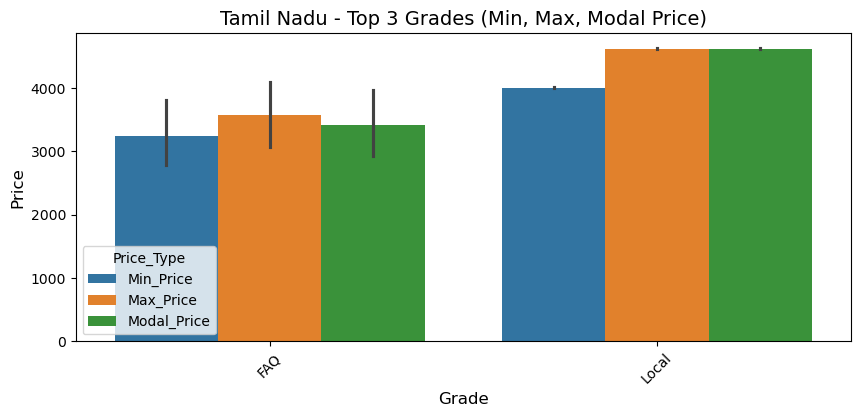

In [39]:
plt.figure(figsize=(10, 4))
sns.barplot(data=top3_melted, x="Grade", y="Price", hue="Price_Type")

plt.title("Tamil Nadu - Top 3 Grades (Min, Max, Modal Price)", fontsize=14)
plt.xlabel("Grade", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.xticks(rotation=45)
plt.show()

## Average Commodity Price by State

In [40]:
df["Modal_Price"] = pd.to_numeric(df["Modal_Price"], errors="coerce")
df = df.dropna(subset=["Modal_Price"])

In [41]:
state_avg = df.groupby("State")["Modal_Price"].mean().reset_index()
state_avg = state_avg.sort_values(by="Modal_Price", ascending=False)

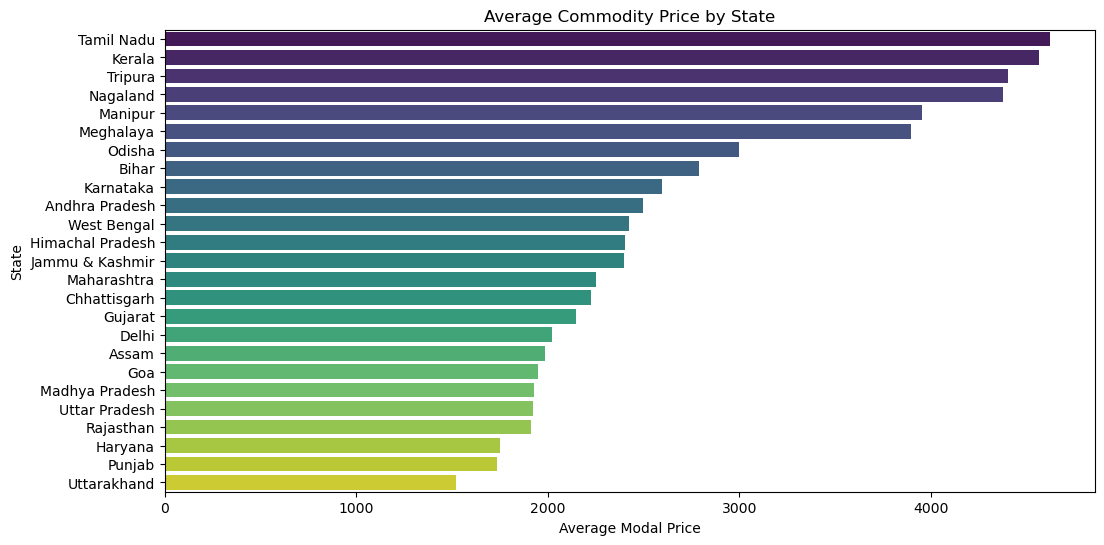

In [42]:
plt.figure(figsize=(12,6))
sns.barplot(data=state_avg, x="Modal_Price", y="State", hue="State", palette="viridis")
plt.title("Average Commodity Price by State")
plt.xlabel("Average Modal Price")
plt.ylabel("State")
plt.show()

## Top 5 States-Commodity Prices

In [43]:
top5_states = state_avg.groupby("State")["Modal_Price"].mean().sort_values(ascending=False).head(5).index

In [44]:
state_top5 = state_avg[state_avg["State"].isin(top5_states)]

In [45]:
top5_states = df.groupby("State")["Modal_Price"].mean().sort_values(ascending=False).head(5).index
state_top5 = df[df["State"].isin(top5_states)]

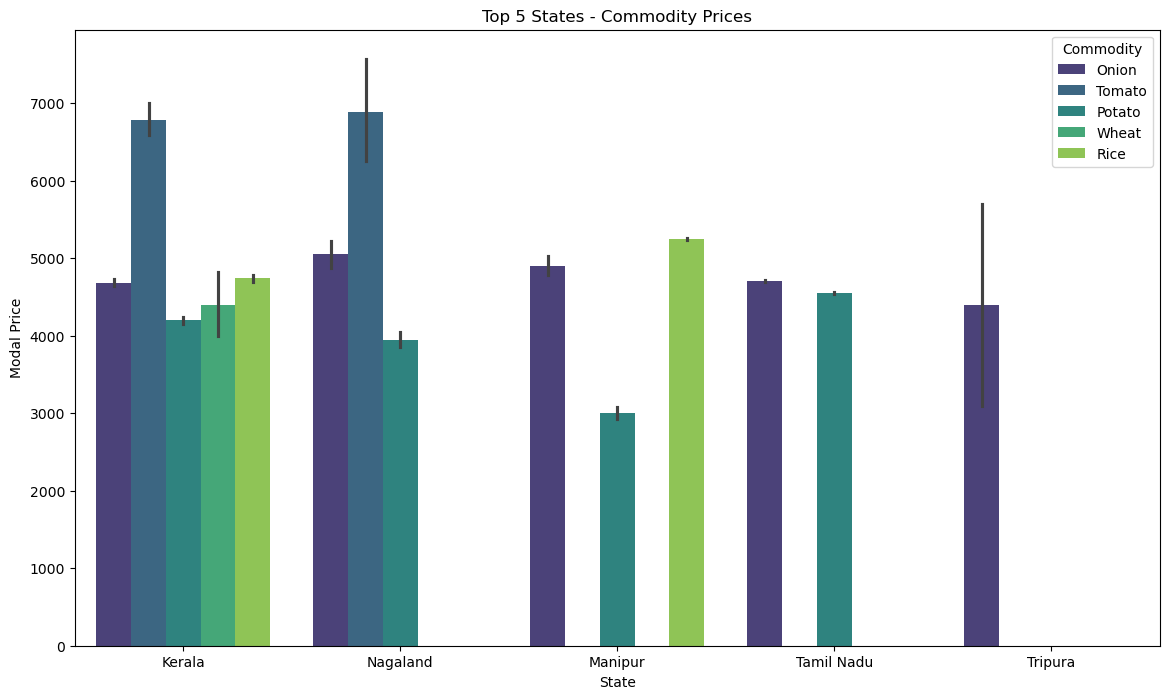

In [46]:
plt.figure(figsize=(14,8))
sns.barplot(
    data=state_top5,
    y="Modal_Price",    
    x="State",          
    hue="Commodity",
    palette="viridis"
)
plt.title("Top 5 States - Commodity Prices")
plt.xlabel("State")
plt.ylabel("Modal Price")
plt.legend(title="Commodity")
plt.show()

### Conclusions